In [ ]:
# TIME SERIES FORECASTING

In [ ]:
import pandas as pd
import datetime as dt
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/census.csv')

# New Section

In [ ]:
df.head()

,Unnamed: 0,District,State,Population,Growth,Sex-Ratio,Literacy
0,1,Thane,Maharashtra,11060148,0.3601,886,84.53
1,2,North Twenty Four Parganas,West Bengal,10009781,0.1204,955,84.06
2,3,Bangalore,Karnataka,9621551,0.4718,916,87.67
3,4,Pune,Maharashtra,9429408,0.3037,915,86.15
4,5,Mumbai Suburban,Maharashtra,9356962,0.0829,860,89.91


In [ ]:
df['update pop'] = (df['Population'] * 11.2/100) + df['Population']
df['50% for herd immunity'] = df['update pop']/2
df

,Unnamed: 0,District,State,Population,Growth,Sex-Ratio,Literacy,update pop,50% for herd immunity
0,1,Thane,Maharashtra,11060148,0.3601,886,84.53,1.229888e+07,6149442.288
1,2,North Twenty Four Parganas,West Bengal,10009781,0.1204,955,84.06,1.113088e+07,5565438.236
2,3,Bangalore,Karnataka,9621551,0.4718,916,87.67,1.069916e+07,5349582.356
3,4,Pune,Maharashtra,9429408,0.3037,915,86.15,1.048550e+07,5242750.848
4,5,Mumbai Suburban,Maharashtra,9356962,0.0829,860,89.91,1.040494e+07,5202470.872
...,...,...,...,...,...,...,...,...,...
635,636,Nicobars,Andaman And Nicobar Islands,36842,-0.1242,777,78.06,4.096830e+04,20484.152
636,637,Upper Siang,Arunachal Pradesh,35320,0.0587,889,59.99,3.927584e+04,19637.920
637,638,Lahul and Spiti,Himachal Pradesh,31564,-0.0500,903,76.81,3.509917e+04,17549.584
638,639,Anjaw,Arunachal Pradesh,21167,0.1419,839,56.46,2.353770e+04,11768.852


In [ ]:
a2 = pd.DataFrame()
for i in range(len(df)):
    if df.iloc[i]['State'] == 'Andhra Pradesh':
        a2 = a2.append(df.iloc[i])

print(len(a2))
a2

23


,50% for herd immunity,District,Growth,Literacy,Population,Sex-Ratio,State,Unnamed: 0,update pop
16,2944987.996,Rangareddy,0.4816,75.87,5296741.0,961.0,Andhra Pradesh,17.0,5889975.992
18,2865788.576,East Godavari,0.0516,70.99,5154296.0,1006.0,Andhra Pradesh,19.0,5731577.152
21,2717624.028,Guntur,0.0947,67.40,4887813.0,1003.0,Andhra Pradesh,22.0,5435248.056
33,2511673.288,Krishna,0.0787,73.74,4517398.0,992.0,Andhra Pradesh,34.0,5023346.576
43,2385567.484,Visakhapatnam,0.1196,66.91,4290589.0,1006.0,Andhra Pradesh,44.0,4771134.968
46,2320779.584,Chittoor,0.1143,71.53,4174064.0,997.0,Andhra Pradesh,47.0,4641559.168
51,2269118.288,Anantapur,0.1210,63.57,4081148.0,977.0,Andhra Pradesh,52.0,4538236.576
53,2253725.428,Kurnool,0.1485,59.97,4053463.0,988.0,Andhra Pradesh,54.0,4507450.856
54,2253483.568,Mahbubnagar,0.1534,55.04,4053028.0,977.0,Andhra Pradesh,55.0,4506967.136
59,2192487.588,Hyderabad,0.0297,83.25,3943323.0,954.0,Andhra Pradesh,60.0,4384975.176


In [ ]:
data1 = pd.read_csv("https://api.covid19india.org/csv/latest/districts.csv")
data1

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,2679.0
1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN
2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN
3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN
4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN
...,...,...,...,...,...,...,...,...
160988,2021-01-04,West Bengal,Purba Bardhaman,12354,12068,95,0,NaN
160989,2021-01-04,West Bengal,Purba Medinipur,20231,19484,275,0,NaN
160990,2021-01-04,West Bengal,Purulia,6990,6716,47,0,NaN
160991,2021-01-04,West Bengal,South 24 Parganas,36205,35438,687,0,NaN


In [ ]:
a1 = pd.DataFrame()
for i in range(len(data1)):
    if data1.iloc[i]['State'] == 'Andhra Pradesh':
        a1 = a1.append(data1.iloc[i])

In [ ]:
m = a1.tail(15)
m

,Confirmed,Date,Deceased,District,Other,Recovered,State,Tested
160341,67397.0,2021-01-04,597.0,Anantapur,0.0,66682.0,Andhra Pradesh,809025.0
160342,86325.0,2021-01-04,844.0,Chittoor,0.0,85233.0,Andhra Pradesh,791735.0
160343,123785.0,2021-01-04,636.0,East Godavari,0.0,122815.0,Andhra Pradesh,967422.0
160344,434.0,2021-01-04,0.0,Foreign Evacuees,0.0,434.0,Andhra Pradesh,NaN
160345,74872.0,2021-01-04,666.0,Guntur,0.0,73728.0,Andhra Pradesh,852177.0
160346,47926.0,2021-01-04,666.0,Krishna,0.0,46759.0,Andhra Pradesh,803134.0
160347,60602.0,2021-01-04,487.0,Kurnool,0.0,60043.0,Andhra Pradesh,892927.0
160348,2461.0,2021-01-04,0.0,Other State,0.0,2461.0,Andhra Pradesh,NaN
160349,62049.0,2021-01-04,579.0,Prakasam,0.0,61388.0,Andhra Pradesh,711492.0
160350,62124.0,2021-01-04,506.0,S.P.S. Nellore,0.0,61181.0,Andhra Pradesh,692285.0


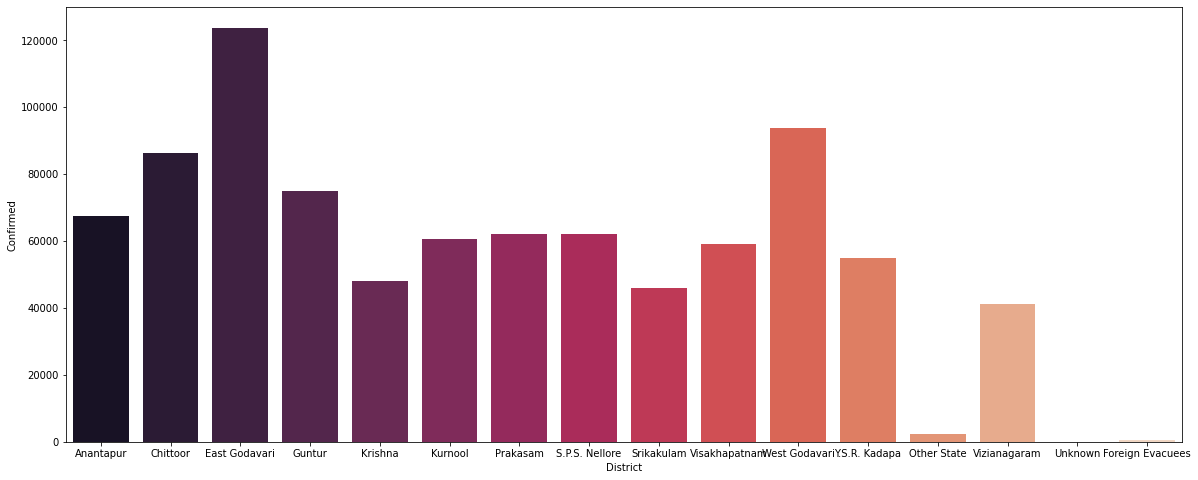

In [ ]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'District', y = m['Confirmed'],data=a1, palette = 'rocket')

In [ ]:
b1 = pd.DataFrame()
for i in range(len(a1)):
    if a1.iloc[i]['District'] == 'East Godavari':
        b1 = b1.append(a1.iloc[i])
b1

,Confirmed,Date,Deceased,District,Other,Recovered,State,Tested
3,39.0,2020-04-26,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN
411,39.0,2020-04-27,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN
832,39.0,2020-04-28,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN
1260,40.0,2020-04-29,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN
1693,42.0,2020-04-30,0.0,East Godavari,0.0,14.0,Andhra Pradesh,NaN
...,...,...,...,...,...,...,...,...
157731,123695.0,2020-12-31,636.0,East Godavari,0.0,122707.0,Andhra Pradesh,967422.0
158384,123740.0,2021-01-01,636.0,East Godavari,0.0,122723.0,Andhra Pradesh,967422.0
159037,123755.0,2021-01-02,636.0,East Godavari,0.0,122747.0,Andhra Pradesh,967422.0
159690,123766.0,2021-01-03,636.0,East Godavari,0.0,122795.0,Andhra Pradesh,967422.0


In [ ]:
b1['daily increase'] = b1['Confirmed'].diff()
b1['daily recovery'] = b1['Recovered'].diff()
b1.fillna(0)

,Confirmed,Date,Deceased,District,Other,Recovered,State,Tested,daily increase,daily recovery
3,39.0,2020-04-26,0.0,East Godavari,0.0,12.0,Andhra Pradesh,0.0,0.0,0.0
411,39.0,2020-04-27,0.0,East Godavari,0.0,12.0,Andhra Pradesh,0.0,0.0,0.0
832,39.0,2020-04-28,0.0,East Godavari,0.0,12.0,Andhra Pradesh,0.0,0.0,0.0
1260,40.0,2020-04-29,0.0,East Godavari,0.0,12.0,Andhra Pradesh,0.0,1.0,0.0
1693,42.0,2020-04-30,0.0,East Godavari,0.0,14.0,Andhra Pradesh,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
157731,123695.0,2020-12-31,636.0,East Godavari,0.0,122707.0,Andhra Pradesh,967422.0,42.0,47.0
158384,123740.0,2021-01-01,636.0,East Godavari,0.0,122723.0,Andhra Pradesh,967422.0,45.0,16.0
159037,123755.0,2021-01-02,636.0,East Godavari,0.0,122747.0,Andhra Pradesh,967422.0,15.0,24.0
159690,123766.0,2021-01-03,636.0,East Godavari,0.0,122795.0,Andhra Pradesh,967422.0,11.0,48.0


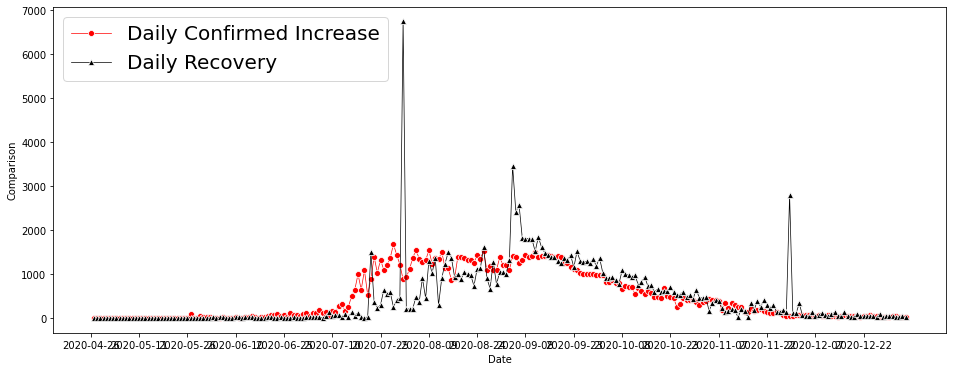

In [ ]:
plt.figure(figsize = (16,6))
sns.lineplot(x = b1['Date'], y = b1['daily increase'], color = 'red', marker = "o",label = 'Daily Confirmed Increase', lw = 0.7)
sns.lineplot(x = b1['Date'], y = b1['daily recovery'], color = 'black', marker = "^", label = 'Daily Recovery', lw = 0.7)
plt.xticks(range(0,252, 15))
plt.ylabel('Comparison')
plt.legend(loc ='upper left', prop={'size': 20})

In [ ]:

b2 = pd.DataFrame(b1,columns=['Date','daily increase'])
b2['daily increase'] = b2['daily increase'].fillna(0)
b2_new = b2.drop(3)
b2_new

,Date,daily increase
411,2020-04-27,0.0
832,2020-04-28,0.0
1260,2020-04-29,1.0
1693,2020-04-30,2.0
2128,2020-05-01,0.0
...,...,...
157731,2020-12-31,42.0
158384,2021-01-01,45.0
159037,2021-01-02,15.0
159690,2021-01-03,11.0


In [ ]:
from google.colab import files

In [ ]:
b2.to_excel('b2.xlsx')
files.download('b2.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import datetime as dt
def parser(x):
  return datetime.strptime(x,"%Y-%m-%d")
dataA = pd.read_csv('/content/b2_increase.csv',index_col='Date', parse_dates=['Date'],date_parser=parser)  
dataA= dataA. loc[:, ~dataA. columns. str. contains('^Unnamed')]
dataA

FileNotFoundError: ignored

In [ ]:
dataA.plot()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dataA) #to check whether it is stationary or not(time series cannot work on non stationary data)

In [ ]:
dataA_diff=dataA.diff(periods=1)
dataA_diff = dataA_diff[1:]
dataA_diff

In [ ]:
plot_acf(dataA_diff)

In [ ]:
X= dataA.values
X.size
train = X[0:178]
test = X[178:]
predictions = []

In [ ]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [ ]:
model_ar= AR(train)
model_ar_fit=model_ar.fit()

In [ ]:
predictions = model_ar_fit.predict(start=178,end=254)

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model_arima=ARIMA(train,order=(7,2,3))#best fit combo of p,d,q
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

In [ ]:

predictions= model_arima_fit.forecast(steps=30)[0]
predictions

In [ ]:
plt.plot(test)
plt.plot(predictions,color='red')

In [ ]:
import  itertools
p=d=q=range(0,8)
pdq = list(itertools.product(p,d,q))
pdq

In [ ]:
for param in pdq:
  try:
    model_arima=ARIMA(train,order=param)
    model_arima_fit=model_arima.fit()
    print(param,model_arima_fit.aic)
  except:
    continue  
